# Simple Jet Dispersion Models

Simple jet dispersion models are a useful tool for evaluating dispersion near the region where a jet release is occuring. They are based on a simplified model where the air is stationary and all of the momentum needed to mix the release is supplied by the jet.


## Gaussian Jet Models
The most basic jet model is a gaussian-type

$$ c = k_1 c_0 \left( d \over z \right) \sqrt{ \rho_j \over \rho_a } \exp \left( - \left( k_2 { y \over x } \right)^2 \right) \left[ \exp \left( - \left( k_2 { (z-h) \over x }\right)^2 \right) + \exp \left( - \left( k_2 { (z+h) \over x }\right)^2 \right) \right]$$

with constants $k_1$ and $k_2$ and the initial concentration $c_0$

This superficially similar to a gaussian plume, however in this case the windspeed is &approx; 0 and the jet velocity is assumed to dominate. There is also an additional term often neglected in treatments of jets to account for ground reflection, if the jet is close to the ground then material will reflect back.

### Example

Suppose a jet release of 0.25g/s of a gaseous material from a circular hole in the side of a vessel, the diameter of the hole is 1cm and it is 1m above the ground, and the release is horizontal. Suppose also that the material has a specific gravity of 0.8 and is otherwise at ambient conditions.

In [2]:
# What we know
m  = 0.25/1000 #kg/s
d  = 0.01   #m
h  = 1.0    #m
ρₐ = 1.225  #kg/m³, density of air
ρⱼ = 0.8*ρₐ #kg/m³

# The constants (from Lee's)
k₁ = 6.0
k₂ = 5.0

5.0

In [3]:
c₀ = ρⱼ

c(x,y,z) = k₁*c₀*(d/x)*√(ρⱼ/ρₐ)*exp(-(k₂*y/x)^2)*(exp(-(k₂*(z-h)/x)^2) + exp(-(k₂*(z+h)/x)^2))

c (generic function with 1 method)

Now we can calculate the concentration at a downstream distance, let's say 2m

In [4]:
c1 = c(2,0,h)

c1

0.026296159415762733

using `GasDispersion.jl` this can be done like so:

First we define the `Scenario`

In [5]:
using GasDispersion

# need a jet velocity
Aₕ = (π/4)*d^2
u = m/(ρⱼ*Aₕ)

s = Scenario( Dict([
        :mass_emission_rate => m,
        :jet_diameter => d,
        :jet_velocity => u,
        :jet_density => ρⱼ,
        :ambient_density => ρₐ,
        :release_height => h,
    ]))

Release scenario:
    mass_emission_rate: 0.00025 kg/s 
    release_duration: missing s 
    jet_diameter: 0.01 m 
    jet_velocity: 3.2480600630999046 m/s 
    jet_density: 0.9800000000000001 kg/m^3 
    release_pressure: missing Pa 
    release_temperature: missing K 
    release_height: 1.0 m 
    windspeed: missing m/s 
    ambient_density: 1.225 kg/m^3 
    ambient_pressure: missing Pa 
    ambient_temperature: missing K 
    pasquill_gifford: missing  
    

Then we call the `plume` factory function using the `:simplejet` model. A "plume" in the context of `GasDispersion.jl` is a continuous release.

In [6]:
jet = plume(s, model=:simplejet);

In [7]:
c1 ≈ jet(2,0,h)

true

`GasDisperson.jl` can also handle jet angles beyond merely the horizontal, for example if the jet was angled downards by 45° we might have something like this

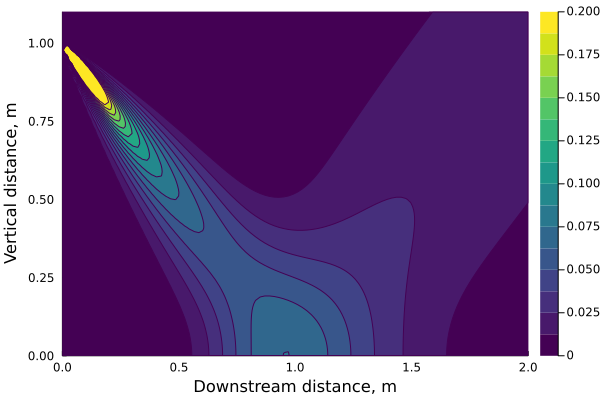

In [8]:
using Plots:contour


angled = plume(s, model=:simplejet, release_angle=-π/4) # 45° down, in radians

xs = range(0, 2, length=100)
zs = range(0, 1.1, length=100)

contour(xs, zs, (x,z)->angled(x, 0, z), c=:viridis, fill=true,
        clim=(0,0.2),
        xlabel="Downstream distance, m",
        ylabel="Vertical distance, m")